# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Fathia Rahma]
- **Email:** [fathia.12th@gmail.com]
- **ID Dicoding:** [fathiarahmaa]

## Menentukan Pertanyaan Bisnis

1. Bagaimana tingkat peminjaman sepeda pada musim tertentu?
2. Bagaimana pola perbedaan waktu peminjaman sepeda di hari libur dan hari kerja?
3. Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda?
4. Apakah ada perbedaan pola antara pengguna casual dan registered pada jam lonjakan peminjaman tertinggi?
5. Apakah ada korelasi antara kecepatan angin dan jumlah peminjaman sepeda?


## Import Semua Packages/Library yang Digunakan

In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import calendar

## Data Wrangling

### Gathering Data

In [ ]:
#Data day.csv
days_df = pd.read_csv("data/day.csv", delimiter=",")
days_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Data Hour.csv
hour_df = pd.read_csv("data/hour.csv", delimiter=",")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Dataset hour memberikan data yang lebih rinci yaitu data untuk setiap jamnya, bukan per hari. Perbedaannya sendiri antara day.csv dan hour.csv adalah penambahan atribut kolom hr di dataset hour.csv

Jadi untuk kedepannya akan menggunakan dataset hour yang lebih lengkap.

**Ringkasan:**
- dteday : Tanggal
- season : musim (1:springer, 2:summer, 3:fall, 4:winter)
- yr : tahun (0: 2011, 1:2012)
- mnth : bulan ( 1 - 12)
- hr : jam (0 - 23)
- holiday : Indikator hari libur (0: bukan hari libur, 1: hari libur).
- weekday : hari dalam seminggu (0: minggu, 1: senin, 2: selasa, 3: rabu, 4: kamis, 5: Jumat, 6: Sabtu)
- workingday : Jika hari itu weekend atau libur maka 1, kalau tidak maka 0.
+ weathersit :
    - 1: Clear/Partly Cloudy
    - 2: Misty/Cloudy
    - 3: Light Snow/Rain
    - 4: Heavy Rain
- temp : Suhu
- atemp: feeling temperature
- hum: Kelembapan 67 (max)
- casual: Jumlah pengguna sepeda non-terdaftar.
- registered: Jumlah pengguna sepeda terdaftar.
- cnt: Jumlah total pengguna sepeda.

### Assessing Data

Ada beberapa teknik untuk memeriksa karakteristik data, contohnya seperti mengecek duplicated values, cek  missing values, cek inaccurate values, dll.


#### Check Data Type

In [229]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


#### Check Missing Value

In [230]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


#### Check Duplicate Data

In [231]:
hour_df.duplicated().sum()

0

**Ringkasan Assesing Data:**
- Dataset terdiri dari 17 kolom dengan 17379 baris
- Tidak ada missing values dan tidak ada data duplikat.
- Variabel `dteday` yang awalnya bertipe object dikonversi ke datetime untuk memudahkan analisis waktu
- Variabel `yr` yang awalnya berupa angka (0 = 2011, 1 = 2012) dikonversi menjadi tahun asli untuk meningkatkan interpretabilitas data.
- Mengubah tipe data `season`, `mnth`,`holiday`,`weekday`,`workingday'
`weathersit` ke kategorikal yang lebih representatif

### Cleaning Data

In [232]:
# Konversi kolom tanggal ke datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [233]:
# Konversi kolom year ke value tahun asli
hour_df['yr'] = hour_df['dteday'].dt.year
hour_df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [234]:
# Mengubah angka menjadi keterangan
hour_df['mnth'] = hour_df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
hour_df['season'] = hour_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
hour_df['weekday'] = hour_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
hour_df['weathersit'] = hour_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain'
})

In [235]:
# Konversi tipe data jadi kategorical
hour_df['season'] = hour_df.season.astype('category')
hour_df['mnth'] = hour_df.mnth.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
hour_df['weathersit'] = hour_df.weathersit.astype('category')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


In [236]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  int32         
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [237]:
# # Simpan DataFrame yang sudah dibersihkan ke file CSV
# hour_df.to_csv('maindata.csv', index=False)


## Exploratory Data Analysis (EDA)

### Explore ...

####Check Statistical Summary

In [238]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379.0,17379,17379.0,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,12,NaN,2.0,7,2.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,Jul,NaN,0.0,Sat,1.0,Clear/Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,1488,NaN,16879.0,2512,11865.0,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


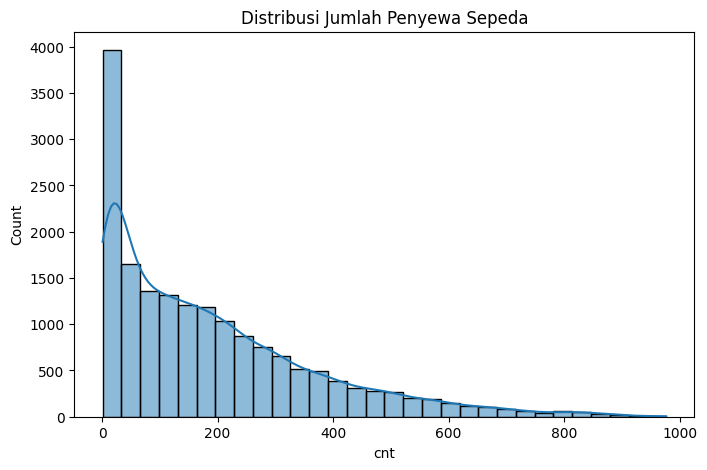

In [239]:
#Distribusi Jumlah Penyewa Sepeda

plt.figure(figsize=(8, 5))
sns.histplot(hour_df['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Penyewa Sepeda')
plt.show()


Distribusi jumlah penyewa sepeda menunjukkan bahwa sebagian besar jam memiliki jumlah penyewaan yang rendah, dengan frekuensi tertinggi berada di rentang 0–100 penyewa. Semakin tinggi jumlah penyewa, semakin jarang terjadi, yang terlihat dari penurunan jumlah kejadian secara bertahap. Distribusi ini termasuk right-skewed, menandakan bahwa jumlah penyewa yang tinggi (>600) jarang terjadi.

In [240]:
#Mengelompokkan pengguna sepeda berdasarkan bulan
hour_df.groupby(by='mnth').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

<ipython-input-240-2add764ede3c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by='mnth').agg({


cnt                        
      max min        mean     sum
mnth                             
Apr   822   1  187.260960  269094
Aug   941   1  238.097627  351194
Dec   759   1  142.303439  211036
Feb   610   1  112.865026  151352
Jan   559   1   94.424773  134933
Jul   913   1  231.819892  344948
Jun   900   1  240.515278  346342
Mar   957   1  155.410726  228920
May   873   1  222.907258  331686
Nov   729   1  177.335421  254831
Oct   963   1  222.158511  322352
Sep   977   1  240.773138  345991

In [241]:
#Mengelompokkan pengguna sepeda berdasarkan hari weekdays
hour_df.groupby(by='weekday').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

<ipython-input-241-7ebbb1dd2fab>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by='weekday').agg({


cnt                        
         max min        mean     sum
weekday                             
Fri      957   1  196.135907  487790
Mon      968   1  183.744655  455503
Sat      783   1  190.209793  477807
Sun      776   1  177.468825  444027
Thu      976   1  196.436665  485395
Tue      970   1  191.238891  469109
Wed      977   1  191.130505  473048

In [242]:
#Mengelompokkan pengguna sepeda berdasarkan hari libur
hour_df.groupby(by='holiday').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

<ipython-input-242-638ff12f5070>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by='holiday').agg({


cnt                        
         max min       mean      sum
holiday                             
0        977   1  190.42858  3214244
1        712   1  156.87000    78435

In [243]:
#Mengelompokkan pengguna sepeda berdasarkan jam
hour_df.groupby(by='hr').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                        
    max min        mean     sum
hr                             
0   283   2   53.898072   39130
1   168   1   33.375691   24164
2   132   1   22.869930   16352
3    79   1   11.727403    8174
4    28   1    6.352941    4428
5    66   1   19.889819   14261
6   213   1   76.044138   55132
7   596   1  212.064649  154171
8   839   5  359.011004  261001
9   426  14  219.309491  159438
10  539   8  173.668501  126257
11  663  10  208.143054  151320
12  776   3  253.315934  184414
13  760  11  253.661180  184919
14  750  12  240.949246  175652
15  750   7  251.233196  183149
16  783  11  311.983562  227748
17  976  15  461.452055  336860
18  977  23  425.510989  309772
19  743  11  311.523352  226789
20  567  11  226.030220  164550
21  584   6  172.314560  125445
22  502   9  131.335165   95612
23  256   2   87.831044   63941

In [244]:
#Mengelompokkan pengguna sepeda berdasarkan kondisi cuaca
hour_df.groupby(by='weathersit').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

<ipython-input-244-737b251a6572>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by='weathersit').agg({


cnt                         
                     max min        mean      sum
weathersit                                       
Clear/Partly Cloudy  977   1  204.869272  2338173
Heavy Rain           164  23   74.333333      223
Light Snow/Rain      891   1  111.579281   158331
Misty/Cloudy         957   1  175.165493   795952

In [245]:
#Mengelompokkan pengguna sepeda berdasarkan Musim
hour_df.groupby(by='season').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

<ipython-input-245-eec9012d5b2c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by='season').agg({


cnt                         
        max min        mean      sum
season                              
Fall    977   1  236.016237  1061129
Spring  801   1  111.114569   471348
Summer  957   1  208.344069   918589
Winter  967   1  198.868856   841613

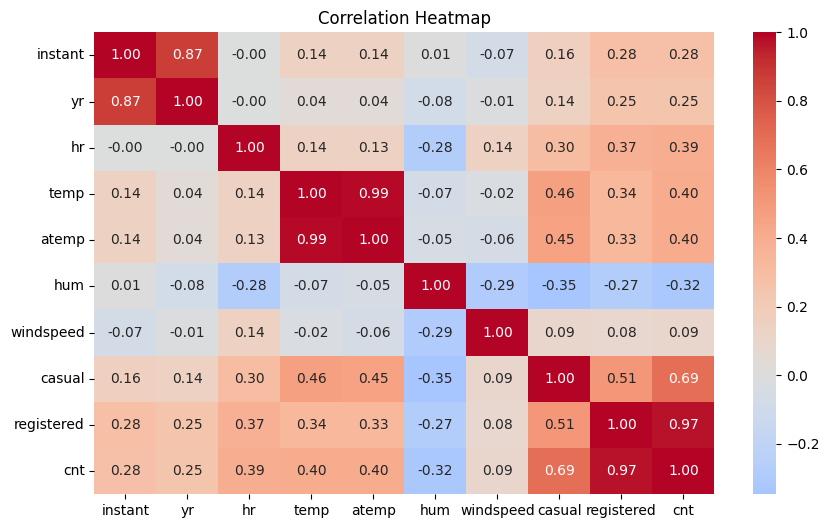

In [246]:
#Mengecek Korelasi Antar Fitur Numerik
correlation_matrix = hour_df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f"
)
plt.title("Correlation Heatmap")
plt.show()

Hasil analisis heatmap korelasi pada dataset ini menunjukkan:

1. Variabel temp dan atemp memiliki korelasi positif yang sangat kuat, yang berarti bahwa suhu aktual dan feeling temperature bergerak sejalan.
2. Variabel casual dan registered memiliki korelasi positif yang cukup tinggi dengan cnt, tetapi registered memiliki hubungan yang lebih kuat. Ini menunjukkan bahwa sebagian besar penyewaan berasal dari pelanggan terdaftar dibandingkan dengan pengguna kasual.
3. Variabel hum menunjukkan korelasi negatif terhadap jumlah penyewaan sepeda (cnt), yang artinya kondisi cuaca yang lebih lembap cenderung mengurangi jumlah penyewa.
4. Variabel windspeed memiliki korelasi yang sangat rendah, menunjukkan bahwa faktor ini tidak banyak berpengaruh terhadap jumlah penyewaan sepeda.

**Rangkuman EDA**
- Penyewaan sepeda lebih tinggi di bulan Mei-ktober dan cuaca cerah.
- Penyewaan lebih rendah pada musim semi, hari libur, dan jam dini hari.
- Penyewaan sepeda tinggi pada jam aktivitas kerja, dengan lonjakan pada jam sibuk yaitu pagi (07:00-09:00) dan sore (17:00-19:00).

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tingkat peminjaman sepeda pada musim tertentu?


<ipython-input-247-5e6c0acafe69>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=hour_df, x='season', y='cnt', estimator=np.mean, ci=None)


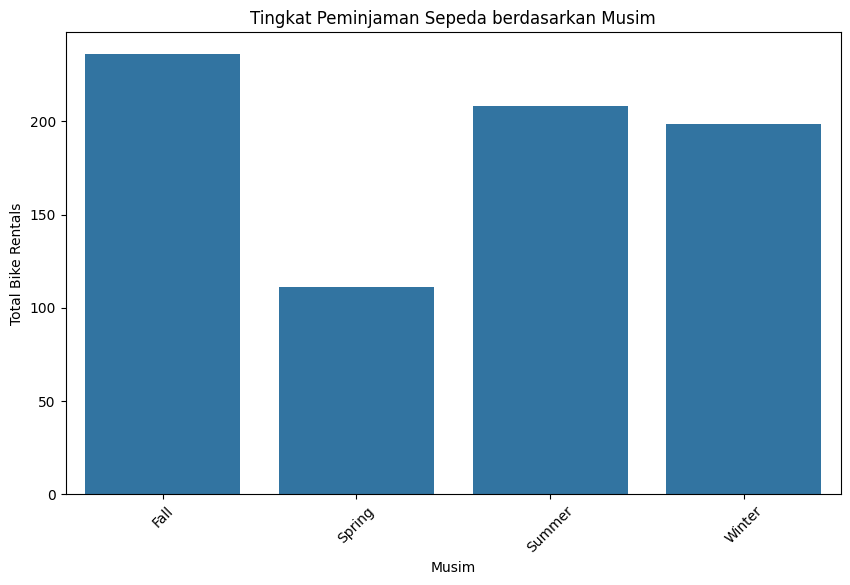

In [247]:
# Bagaimana tingkat peminjaman sepeda pada musim tertentu?

plt.figure(figsize=(10, 6))
sns.barplot(data=hour_df, x='season', y='cnt', estimator=np.mean, ci=None)
plt.title('Tingkat Peminjaman Sepeda berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Total Bike Rentals')
plt.xticks(rotation=45)
plt.show()


In [248]:
# Menghitung statistik peminjaman sepeda berdasarkan kondisi musim
season_stats = hour_df.groupby('season')['cnt'].agg(['mean', 'std', 'count']).reset_index()

# Menampilkan hasil
print(season_stats)


   season        mean         std  count
0    Fall  236.016237  197.711630   4496
1  Spring  111.114569  119.224010   4242
2  Summer  208.344069  188.362473   4409
3  Winter  198.868856  182.967972   4232


<ipython-input-248-0245a8332ef9>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_stats = hour_df.groupby('season')['cnt'].agg(['mean', 'std', 'count']).reset_index()


### Pertanyaan 2: Bagaimana pola perbedaan waktu peminjaman sepeda di hari libur dan hari kerja?

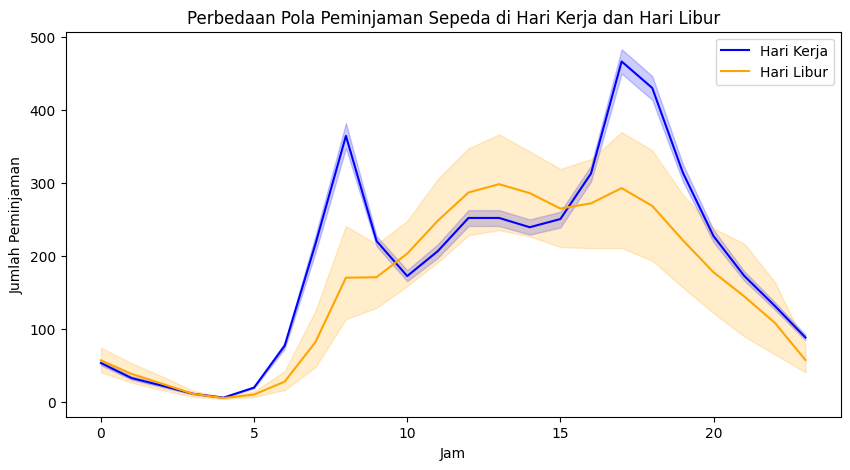

In [249]:
#Bagaimana pola perbedaan waktu peminjaman sepeda di hari libur dan hari kerja?

plt.figure(figsize=(10, 5))

# Plot garis untuk hari kerja (holiday == 0)
sns.lineplot(
    x='hr', y='cnt', data=hour_df[hour_df['holiday'] == 0],
    estimator='mean', color='blue', label='Hari Kerja'
)

# Plot garis untuk hari libur (holiday == 1)
sns.lineplot(
    x='hr', y='cnt', data=hour_df[hour_df['holiday'] == 1],
    estimator='mean', color='orange', label='Hari Libur'
)

plt.title('Perbedaan Pola Peminjaman Sepeda di Hari Kerja dan Hari Libur')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')
plt.legend()
plt.show()



### Pertanyaan 3: Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda?

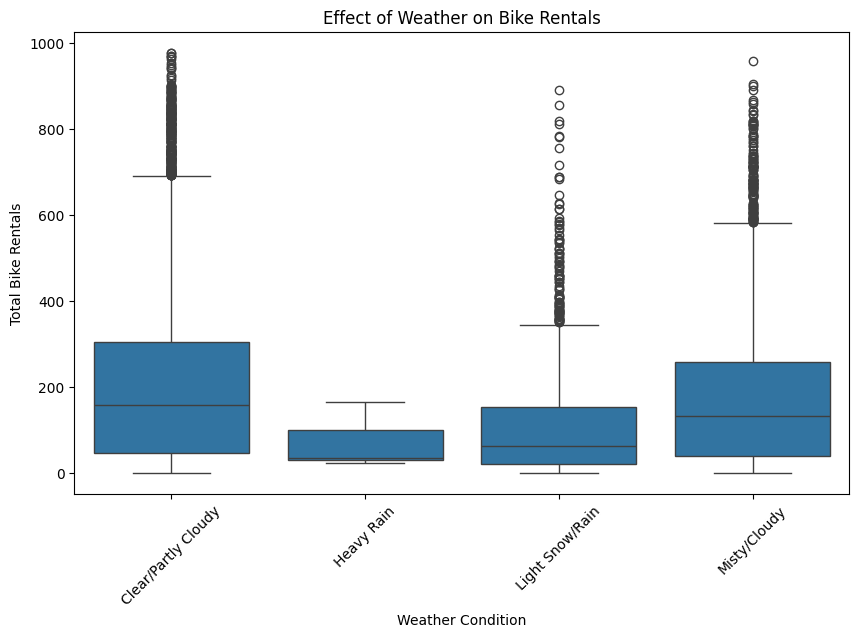

In [250]:
# Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda?

plt.figure(figsize=(10, 6))
sns.boxplot(data=hour_df, x='weathersit', y='cnt')
plt.title('Effect of Weather on Bike Rentals')
plt.xlabel('Weather Condition')
plt.ylabel('Total Bike Rentals')
plt.xticks(rotation=45)
plt.show()


<ipython-input-251-ee69bf046aa1>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=hour_df, x='weathersit', y='cnt', estimator=np.mean, ci=None)


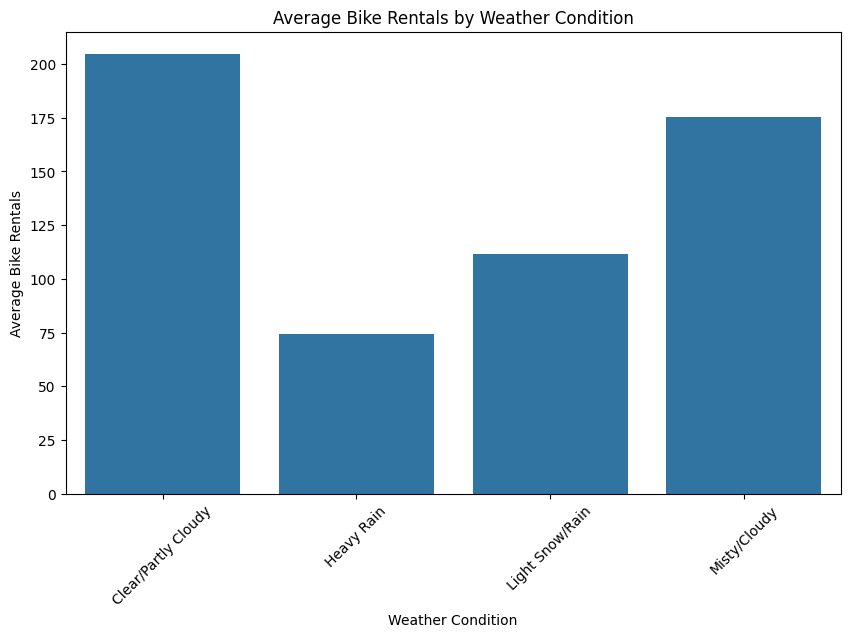

In [251]:
# Versi barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=hour_df, x='weathersit', y='cnt', estimator=np.mean, ci=None)
plt.title('Average Bike Rentals by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Bike Rentals')
plt.xticks(rotation=45)
plt.show()


In [252]:
# Menghitung statistik peminjaman sepeda berdasarkan kondisi cuaca
weather_stats = hour_df.groupby('weathersit')['cnt'].agg(['mean', 'std', 'count']).reset_index()

# Menampilkan hasil
print(weather_stats)


            weathersit        mean         std  count
0  Clear/Partly Cloudy  204.869272  189.487773  11413
1           Heavy Rain   74.333333   77.925178      3
2      Light Snow/Rain  111.579281  133.781045   1419
3         Misty/Cloudy  175.165493  165.431589   4544


<ipython-input-252-67af60b838be>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_stats = hour_df.groupby('weathersit')['cnt'].agg(['mean', 'std', 'count']).reset_index()


### Pertanyaan 4: Apakah ada perbedaan pola antara pengguna casual dan registered pada jam lonjakan peminjaman tertinggi?


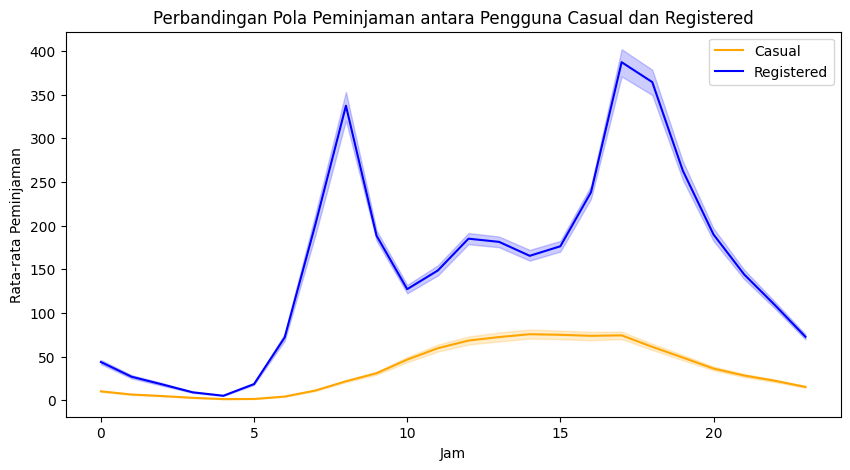

In [253]:
#Apakah ada perbedaan pola antara pengguna casual dan registered pada jam lonjakan peminjaman tertinggi?
plt.figure(figsize=(10, 5))

sns.lineplot(x='hr', y='casual', data=hour_df, estimator='mean', label='Casual', color='orange')
sns.lineplot(x='hr', y='registered', data=hour_df, estimator='mean', label='Registered', color='blue')

plt.title('Perbandingan Pola Peminjaman antara Pengguna Casual dan Registered')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Peminjaman')
plt.legend()
plt.show()



### Pertanyaan 5: Apakah ada korelasi antara kecepatan angin dan jumlah peminjaman sepeda?

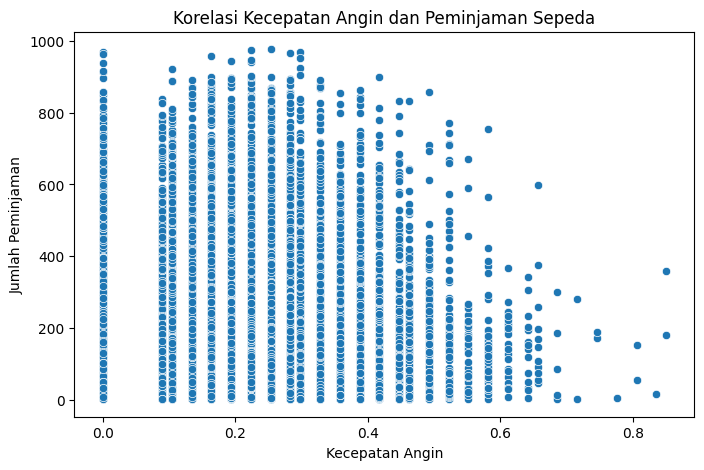

In [254]:
# Apakah ada korelasi antara kecepatan angin dan jumlah peminjaman sepeda?
plt.figure(figsize=(8, 5))
sns.scatterplot(x='windspeed', y='cnt', data=hour_df)
plt.title('Korelasi Kecepatan Angin dan Peminjaman Sepeda')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Peminjaman')
plt.show()


## Analisis Lanjutan

Dalam analisis lanjutan ini, clustering dilakukan berdasarkan aktivitas penyewaan sepeda dalam rentang waktu tertentu sepanjang hari. Waktu dibagi menjadi lima kelompok utama untuk mengidentifikasi pola penggunaan sepeda pada berbagai periode.

- Dini Hari (00:00 - 05:59) → Aktivitas rendah
- Pagi (06:00 - 09:59) → Waktu sibuk (berangkat kerja/sekolah)
- Siang (10:00 - 15:59) → Aktivitas stabil (rekreasi atau perjalanan singkat)
- Sore (16:00 - 19:59) → Waktu sibuk (pulang kerja/sekolah)
- Malam (20:00 - 23:59) → Aktivitas menurun

In [255]:
# Fungsi untuk mengelompokkan jam berdasarkan aktivitas
def categorize_time(hr):
    if 0 <= hr < 6:
        return "Dini Hari"
    elif 6 <= hr < 10:
        return "Pagi"
    elif 10 <= hr < 16:
        return "Siang"
    elif 16 <= hr < 20:
        return "Sore"
    else:
        return "Malam"

# Terapkan kategori ke dataset
hour_df['time_category'] = hour_df['hr'].apply(categorize_time)

# Lihat Total Peminjaman Sepeda dengan hasil binning
total_counts = hour_df.groupby('time_category')['cnt'].sum().reset_index()
print(total_counts)

  time_category      cnt
0     Dini Hari   106509
1         Malam   449548
2          Pagi   629742
3         Siang  1005711
4          Sore  1101169


<ipython-input-256-5ecb3e248f16>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='time_category', y='cnt', data=hour_df, palette="Blues")


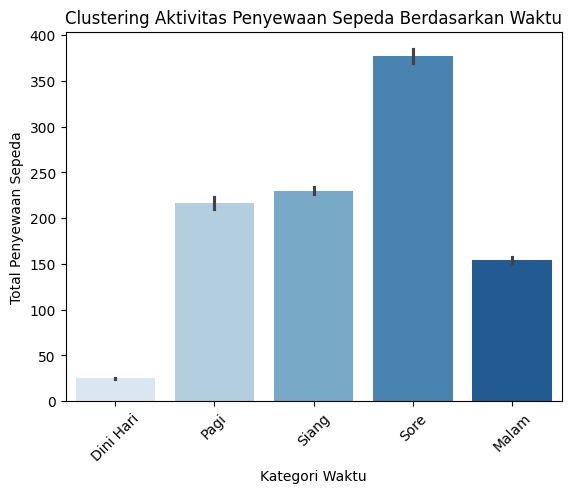

In [256]:
#Visualisasi dalam bentuk barchart
sns.barplot(x='time_category', y='cnt', data=hour_df, palette="Blues")

# Tambahkan label dan judul
plt.xlabel("Kategori Waktu")
plt.ylabel("Total Penyewaan Sepeda")
plt.title("Clustering Aktivitas Penyewaan Sepeda Berdasarkan Waktu")
plt.xticks(rotation=45)
plt.show()

Berdasarkan hasil clustering waktu, dapat disimpulkan bahwa penyewaan sepeda mencapai puncaknya pada sore hari (16:00 - 19:59) dengan 1.310 penyewaan, diikuti oleh siang hari (10:00 - 15:59) dengan 1.170 penyewaan. Aktivitas penyewaan juga cukup tinggi di pagi hari (06:00 - 09:59) dengan 850 penyewaan, menunjukkan bahwa sepeda banyak digunakan untuk keperluan transportasi kerja atau sekolah. Sementara itu, malam hari (20:00 - 23:59) memiliki lebih sedikit penyewaan (610), dan dini hari (00:00 - 05:59) menunjukkan aktivitas terendah dengan hanya 155 penyewaan.

Hal ini mengindikasikan bahwa penyewaan sepeda lebih aktif pada jam-jam kerja dan perjalanan harian, sementara malam dan dini hari memiliki permintaan yang lebih rendah.

## Conclusion

1. Bagaimana tingkat peminjaman sepeda pada musim tertentu?
  - Berdasarkan barplot yang terlihat, peminjaman sepeda tertinggi terjadi pada musim gugur, diikuti oleh musim panas dan musim dingin, sementara musim semi memiliki jumlah peminjaman terendah.  
2. Bagaimana pola perbedaan waktu peminjaman sepeda di hari libur dan hari kerja?
  - Berdasarkan grafik, peminjaman sepeda pada hari kerja menunjukkan dua puncak utama, yaitu pada pagi dan sore hari, yang kemungkinan besar bertepatan dengan jam berangkat dan pulang kerja.
  - Pada hari libur, pola peminjaman lebih merata sepanjang hari tanpa lonjakan signifikan, menunjukkan bahwa penggunaan sepeda lebih fleksibel dan tidak bergantung pada jam kerja
3. Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda?
  - Cuaca memiliki pengaruh signifikan terhadap jumlah peminjaman sepeda
  - Peminjaman tertinggi terjadi pada kondisi Clear/Partly Cloudy, sementara Severe Weather menyebabkan penurunan drastis.
  - Terdapat banyak outlier pada cuaca cerah dan berawan ringan, menunjukkan fluktuasi tinggi dalam peminjaman, kemungkinan dipengaruhi oleh faktor eksternal seperti jam sibuk atau event tertentu.
4. Apakah ada perbedaan pola antara pengguna casual dan registered pada jam lonjakan peminjaman tertinggi?
  - Pengguna registered menunjukkan lonjakan peminjaman yang jelas pada jam 07:00 - 09:00 dan 17:00 - 19:00, menunjukkan pola perjalanan yang terkait dengan jam aktif kerja.
  - Pengguna casual memiliki pola peminjaman yang lebih stabil sepanjang hari, dengan peningkatan bertahap di siang hingga sore hari, menunjukkan bahwa mereka lebih banyak menggunakan sepeda untuk rekreasi atau aktivitas santai.
5. Apakah ada korelasi antara kecepatan angin dan jumlah peminjaman sepeda?
  - Berdasarkan scatter plot, terlihat bahwa tidak ada korelasi yang kuat antara kecepatan angin dan jumlah peminjaman sepeda.
  - Peminjaman sepeda tetap tinggi pada kecepatan angin rendah hingga sedang, tetapi cenderung menurun saat kecepatan angin semakin tinggi. Hal ini menunjukkan bahwa angin kencang mungkin sedikit mempengaruhi aktivitas peminjaman, tetapi bukan faktor utama.
